<a href="https://colab.research.google.com/github/Tuchsanai/AIMaster-seagate-training-2024/blob/main/Day2/transformer_pipeline/zero_shot_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Transformers installation
!pip install transformers datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 28.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


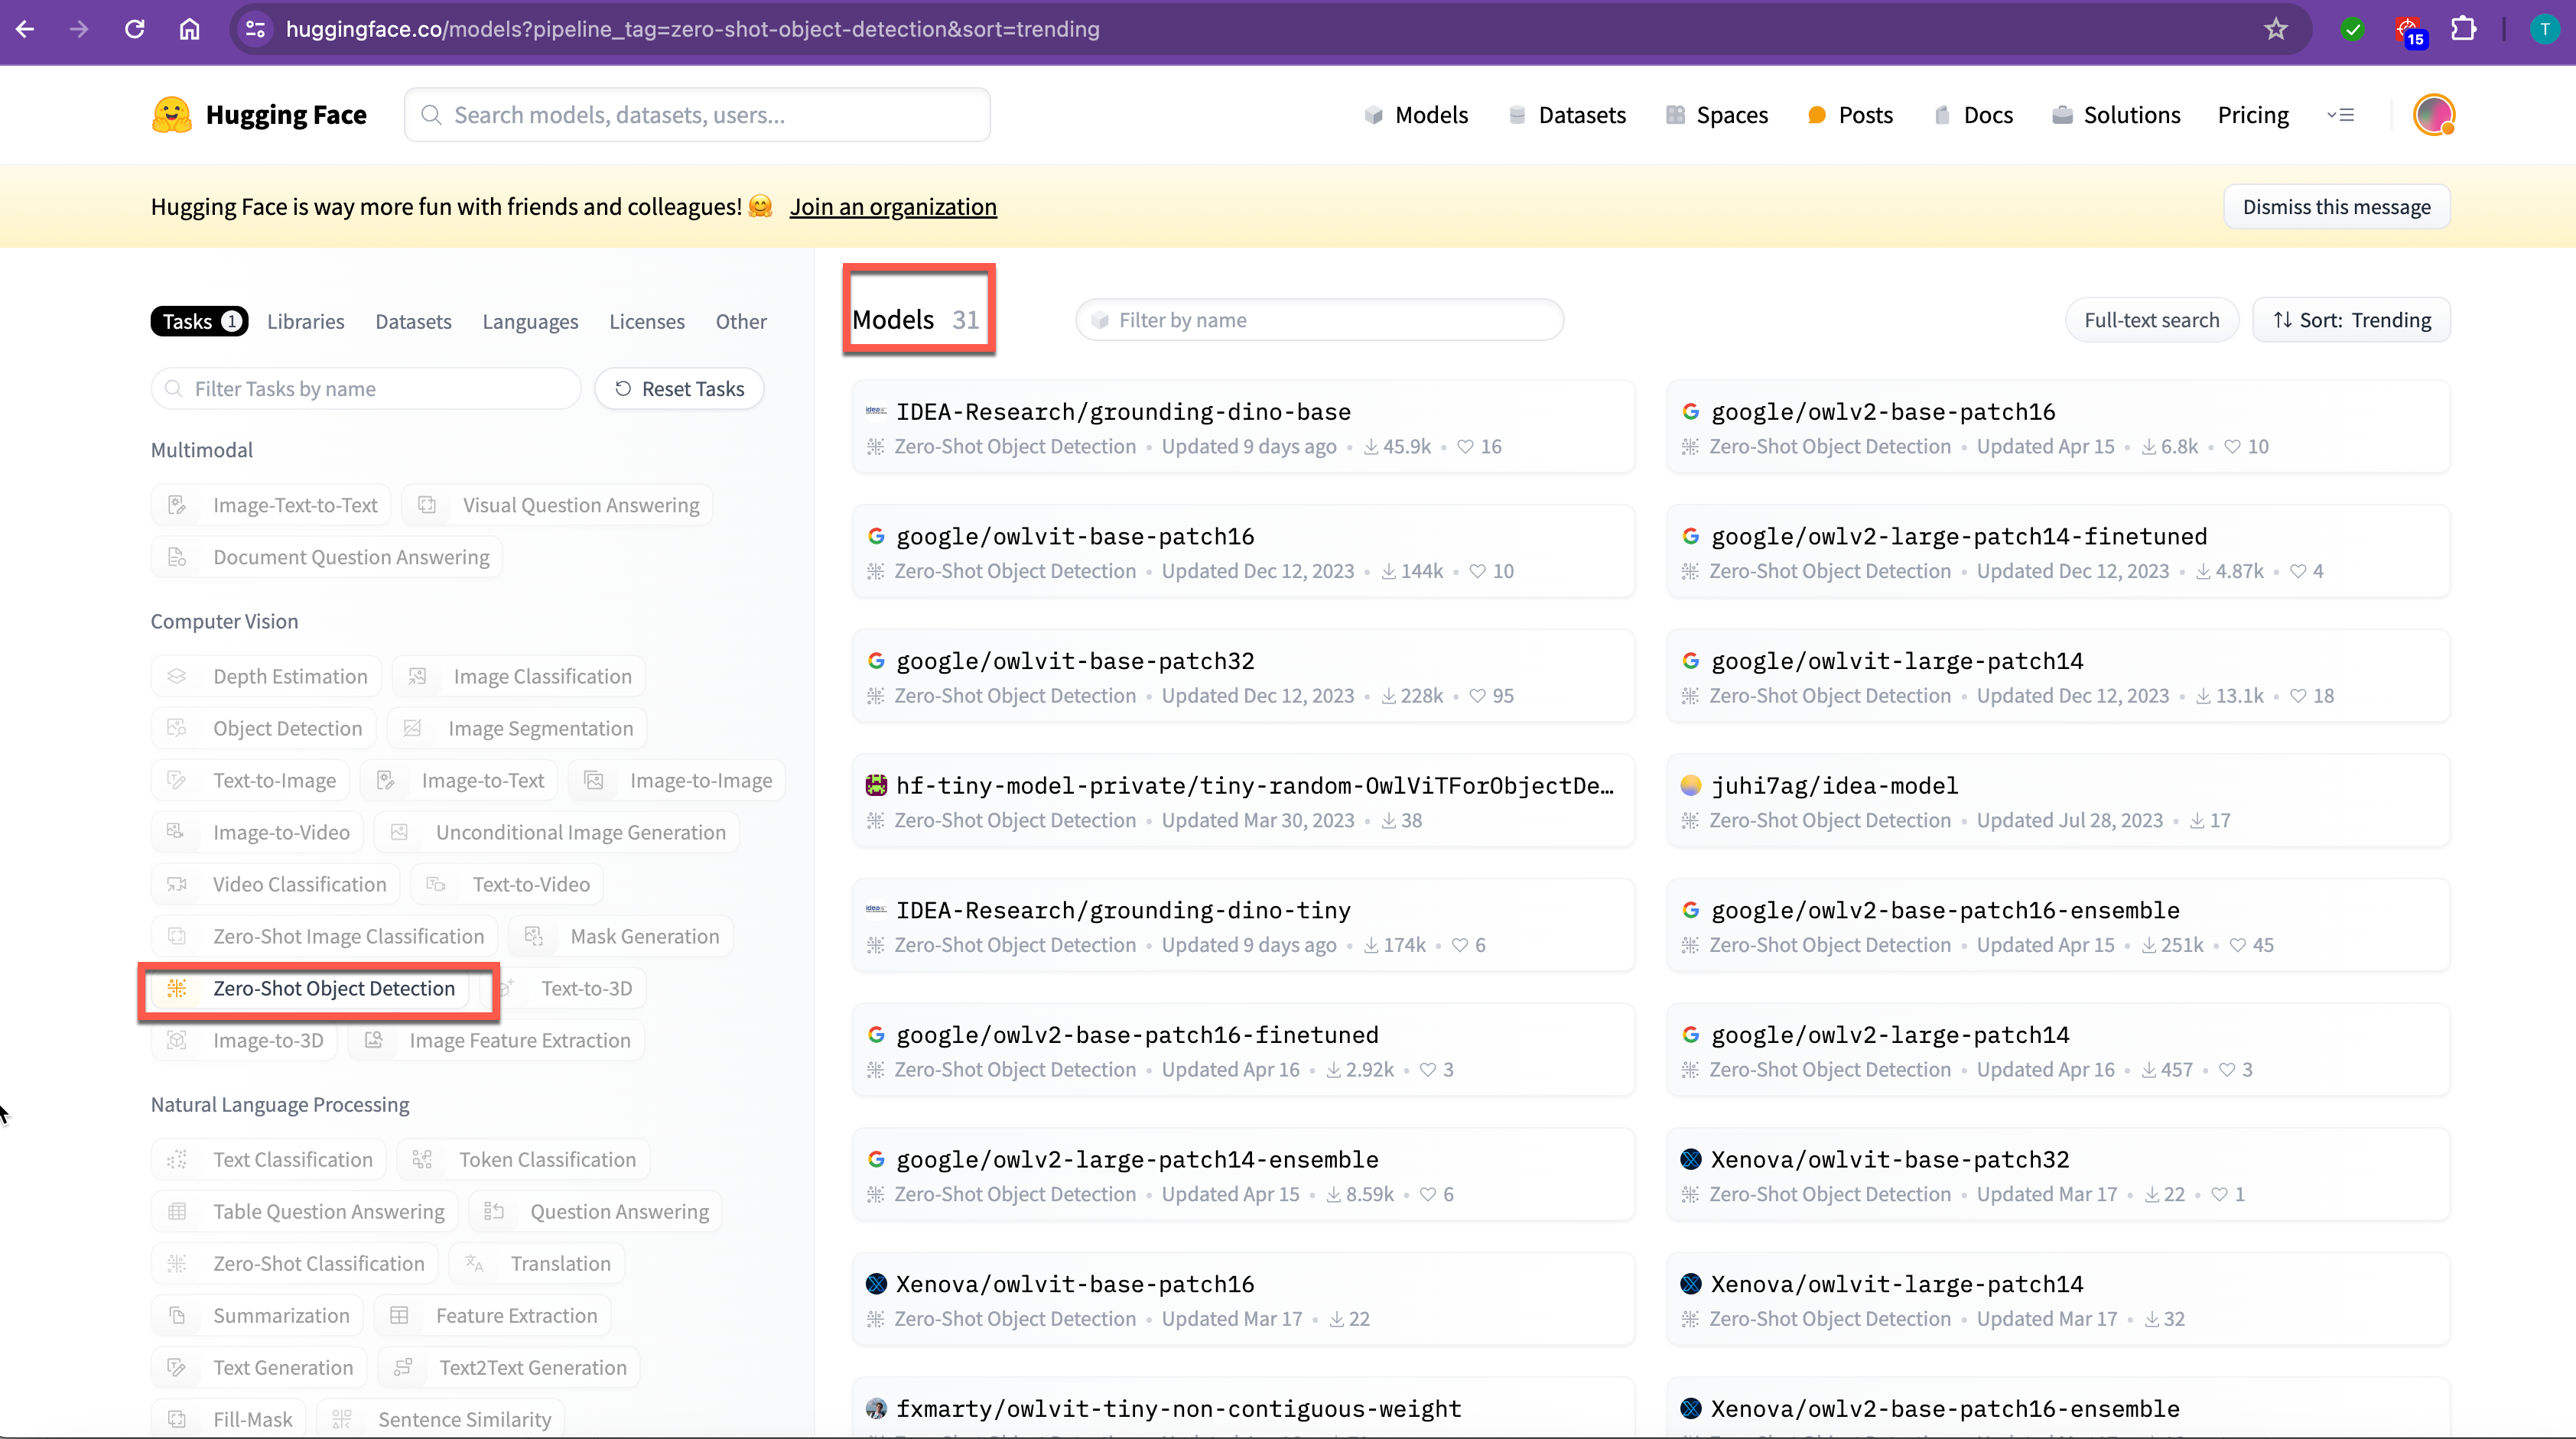

# Zero-shot object detection

Traditionally, models used for [object detection](https://huggingface.co/docs/transformers/main/en/tasks/object_detection) require labeled image datasets for training,
and are limited to detecting the set of classes from the training data.

Zero-shot object detection is supported by the [OWL-ViT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/owlvit) model which uses a different approach. OWL-ViT
is an open-vocabulary object detector. It means that it can detect objects in images based on free-text queries without
the need to fine-tune the model on labeled datasets.

OWL-ViT leverages multi-modal representations to perform open-vocabulary detection. It combines [CLIP](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/clip) with
lightweight object classification and localization heads. Open-vocabulary detection is achieved by embedding free-text queries with the text encoder of CLIP and using them as input to the object classification and localization heads.
associate images and their corresponding textual descriptions, and ViT processes image patches as inputs. The authors
of OWL-ViT first trained CLIP from scratch and then fine-tuned OWL-ViT end to end on standard object detection datasets using
a bipartite matching loss.


## Zero-shot object detection pipeline

https://huggingface.co/google/owlvit-base-patch32

In [3]:
from transformers import pipeline

checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Next, choose an image you'd like to detect objects in. Here we'll use the image of astronaut Eileen Collins that is
a part of the [NASA](https://www.nasa.gov/multimedia/imagegallery/index.html) Great Images dataset.

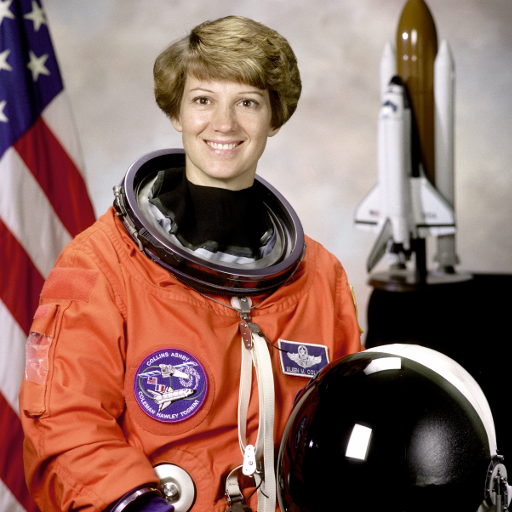

In [11]:
import skimage
import numpy as np
from PIL import Image

image = skimage.data.astronaut()
image = Image.fromarray(np.uint8(image)).convert("RGB")

image

In [12]:
predictions = detector(image,candidate_labels=["human face", "rocket", "nasa badge", "star-spangled banner"])
predictions

[{'score': 0.3571370244026184,
  'label': 'human face',
  'box': {'xmin': 180, 'ymin': 71, 'xmax': 271, 'ymax': 178}},
 {'score': 0.28099697828292847,
  'label': 'nasa badge',
  'box': {'xmin': 129, 'ymin': 348, 'xmax': 206, 'ymax': 427}},
 {'score': 0.21102380752563477,
  'label': 'rocket',
  'box': {'xmin': 350, 'ymin': -1, 'xmax': 468, 'ymax': 288}},
 {'score': 0.13790462911128998,
  'label': 'star-spangled banner',
  'box': {'xmin': 1, 'ymin': 1, 'xmax': 105, 'ymax': 509}},
 {'score': 0.11950109899044037,
  'label': 'nasa badge',
  'box': {'xmin': 277, 'ymin': 338, 'xmax': 327, 'ymax': 380}},
 {'score': 0.10649354010820389,
  'label': 'rocket',
  'box': {'xmin': 358, 'ymin': 64, 'xmax': 424, 'ymax': 280}}]

Let's visualize the predictions:

In [ ]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image

<div class="flex justify-center">
     <img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/zero-sh-obj-detection_2.png" alt="Visualized predictions on NASA image"/>
</div>